In [71]:
import pandas as pd
import numpy as np 
import requests, json, os
os.makedirs("data/raw", exist_ok= True)
os.makedirs("data/processed", exist_ok=True)
os.makedirs("outputs/plots", exist_ok=True)

In [72]:
## I will fetch the Api to download data from NASA Meteoritical society

##url ="https://data.nasa.gov/resource/y77d-th95.json"
##url = "https://data.nasa.gov/resource/gh4g-9sfh.json"


## I tried above mentioned APiIs but they didn't work finally I got the correct Api from NASAs Open Data website
url = "https://data.nasa.gov/docs/legacy/meteorite_landings/gh4g-9sfh.json"

# Fetching data
response = requests.get(url, params = {"$limit": 50000})
## we used response.raise to show us error if the error occurs like 404, 505 rather it closes silently
response.raise_for_status()

data = response.json()
# Now i will save the data file locally which is being downloaded in json file and will be stored as python
# list of dictionaries

with open("data/raw/meteorites.json", "w", encoding ="utf-8") as f: 
    json.dump(data, f, indent=2)

In [73]:
## Now I am loading the data in normal table format instead of nest JSON fil which is downloaded as a default style

df = pd.json_normalize(data)
df.head(5)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation.latitude,geolocation.longitude,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,50.775,6.08333,NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,56.18333,10.23333,NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,54.21667,-113.0,NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,16.88333,-99.9,NaN,NaN
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,-33.16667,-64.95,NaN,NaN


In [74]:
df.info()
print("\n These are the Columns:\n", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         1000 non-null   object
 1   id                           1000 non-null   object
 2   nametype                     1000 non-null   object
 3   recclass                     1000 non-null   object
 4   mass                         972 non-null    object
 5   fall                         1000 non-null   object
 6   year                         999 non-null    object
 7   reclat                       988 non-null    object
 8   reclong                      988 non-null    object
 9   geolocation.latitude         988 non-null    object
 10  geolocation.longitude        988 non-null    object
 11  :@computed_region_cbhk_fwbd  133 non-null    object
 12  :@computed_region_nnqa_25f4  134 non-null    object
dtypes: object(13)
memory usage: 101.7+

In [75]:
## I will keep the important columns, and will ignore other columns which are not necessary for us
## the columns like geolocation.latitude

keep_cols = ['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat', 'reclong']
df = df[keep_cols]
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000


In [76]:
## Now I am going to clean the data

df.columns =  ['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat', 'reclong']

## Converting the types
df['mass'] = pd.to_numeric(df['mass'], errors='coerce')
df['year'] = pd.to_datetime(df['year'], errors='coerce')

## Going to drop rows with that are without coordinates
df= df.dropna(subset = ['reclat', 'reclong',])

## Going to remove unrealistic masses
df = df[df['mass'] < 1e6]

## Dropping Duplicates
df = df.drop_duplicates(subset = ['name', 'year', 'reclat', 'reclong'])

print(" Now You May See The Cleaned Data Shape", df.shape)
df.head()


 Now You May See The Cleaned Data Shape (955, 9)


,name,id,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.775000,6.083330
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.183330,10.233330
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.216670,-113.000000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.883330,-99.900000
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.166670,-64.950000


In [77]:
## Will save the cleaned data

df.to_csv('data/processed/Clean_Meteorites.csv', index = False)
print('Cleaned data saved successfully')

Cleaned data saved successfully


In [78]:
## Will do Some Exploratory Data Analysis

print("Number of Meteorites:", len(df))
print("Time Range:" , df['year'].min(), "to", df['year'].max())
print ("\nTop 5 Heavy Mateorites:\n")
print(df.sort_values(by='mass', ascending=False).head(5)[['name','mass','year','recclass']])

Number of Meteorites: 955
Time Range: 1688-01-01 00:00:00 to 2013-01-01 00:00:00

Top 5 Heavy Mateorites:

          name      mass       year     recclass
418    Jianshi  600000.0 1890-01-01  Iron, IIIAB
490  Knyahinya  500000.0 1866-01-01        L/LL5
718    Ochansk  500000.0 1887-01-01           H4
760  Paragould  408000.0 1930-01-01          LL5
121   Bjurböle  330000.0 1899-01-01        L/LL4


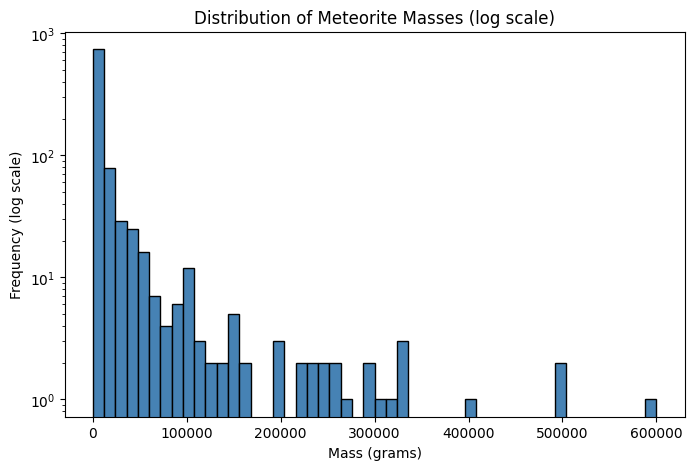

In [79]:
## Visualization with MAtPLOTLIB

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['mass'], bins=50, color='steelblue', edgecolor='black')
plt.yscale('log')
plt.title("Distribution of Meteorite Masses (log scale)")
plt.xlabel("Mass (grams)")
plt.ylabel("Frequency (log scale)")
plt.show()


In [80]:
## Now I want to make Interactive plot with the help of Folium

import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[0,0], zoom_start=2)
mc = MarkerCluster().add_to(m)

for _, r in df.sample(900).iterrows():  # limit to 900 for speed
    folium.CircleMarker(
        location=[r['reclat'], r['reclong']],
        radius=3,
        color='red' if r['fall']=="Fell" else 'blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"{r['name']} ({r['year'].year if pd.notnull(r['year']) else 'N/A'}) - {r['mass']}g"
    ).add_to(mc)

m.save("outputs/plots/meteorite_map.html")
print("✅ Interactive map saved at outputs/plots/meteorite_map.html")


✅ Interactive map saved at outputs/plots/meteorite_map.html


In [81]:
## Now I want to do Some More Necessary EDA (Exploratory Data Analaysis)
## But keep in mind we will do this EDA on the data that wwe have just CLEANED, not the original data.

from pathlib import Path
# We have to check path of the cleaned data file, if it already exists
proc_path = Path("data/processed/Clean_Meteorites.csv")
assert proc_path.exists()

## Now will load the already cleaned Meteorites data
df =pd.read_csv(proc_path, parse_dates =['year'], infer_datetime_format=True)

## will do quick cehcks
print("Rows, Columns:", df.shape)
print (df.dtypes)
print("Null per column:\n",df.isnull().sum())

Rows, Columns: (955, 9)
name                object
id                   int64
nametype            object
recclass            object
mass               float64
fall                object
year        datetime64[ns]
reclat             float64
reclong            float64
dtype: object
Null per column:
 name         0
id           0
nametype     0
recclass     0
mass         0
fall         0
year        12
reclat       0
reclong      0
dtype: int64


C:\Users\UNIQUE COMPUTERS\AppData\Local\Temp\ipykernel_3248\2263719749.py:10: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df =pd.read_csv(proc_path, parse_dates =['year'], infer_datetime_format=True)


In [82]:
## I will now, create convinient time fields e.g "year" "decade" and clean small issues

## First of all its good to make a copy of df
df =df.copy()

## We want year in integer and decade as e.g 1993

df['year_only'] = pd.to_datetime(df["year"], errors='coerce').dt.year
## Since we only need rows wih year, so we will chose only year 
df= df[df['year_only'].notna()]
df['year_only'] = df['year_only'].astype(int)
df['decade'] = (df['year_only'] // 10* 10).astype(int)

## We will also make sure the mass in numeric
df['mass'] = pd.to_numeric(df['mass'], errors = 'coerce')

## Basic sanity filter 
df=df[df['mass'] >0]
print('After cleaning of time & mass:', df.shape)

After cleaning of time & mass: (943, 11)


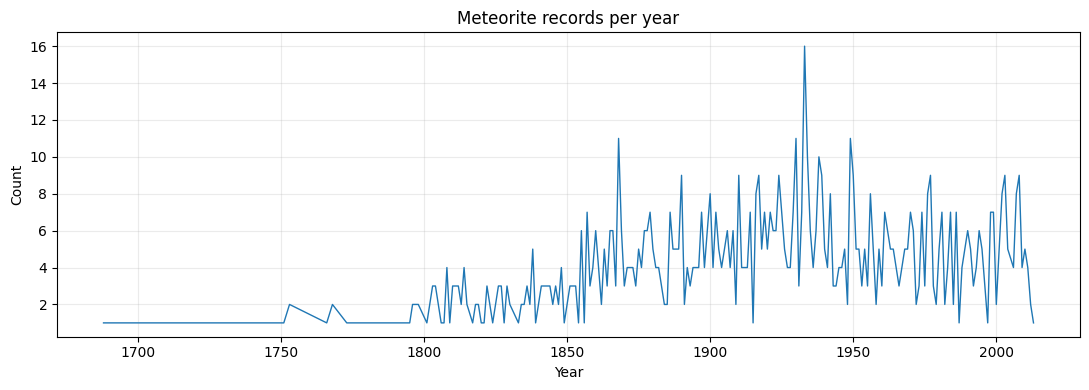

In [96]:
## Will do Years Count, computing and plotting
import matplotlib.pyplot as plt
from pathlib import Path
## Will make group by year
yearly=df.groupby('year_only').size().rename('count')

plt.figure(figsize=(11,4))
## yearly.index will be on x-axis, and yearly.values will be on y-axis
plt.plot(yearly.index, yearly.values, linewidth = 1)
plt.title('Meteorite records per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(alpha = 0.25)
plt.tight_layout()

## Now saving the plot
Path('outputs/plots').mkdir(parents = True, exist_ok = True)
plt.savefig('outputs/plots/yearly_counts.png', dpi =300)

plt.show()
plt.close()



In [97]:
## Summary of Decade and Table

decade_counts = df.groupby('decade').size().rename('count').reset_index().sort_values('decade')
decade_counts
# save this
decade_counts.to_csv('outputs/decade_summary.csv', index = False)

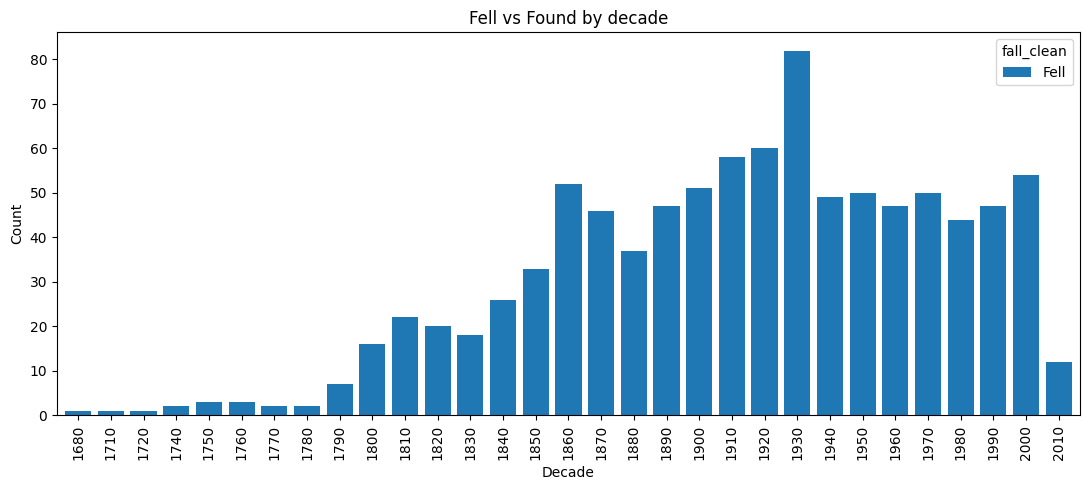

In [99]:
## Fell vs Found by Decade 

## will ensure consistant fall values
df['fall_clean'] = df['fall'].str.strip().replace({np.nan:"Unknown"})

pv = df.groupby(['decade', 'fall_clean']).size().unstack(fill_value=0).sort_index()

## Plotting stacked bar
ax = pv.plot(kind='bar', stacked =True, figsize=(11, 5), width=0.8)
ax.set_title("Fell vs Found by decade")
ax.set_xlabel('Decade')
ax.set_ylabel('Count')
plt.tight_layout()

## Saving
plt.savefig('outputs/plots/fell_vs_found_by_decade.png', dpi=150)
pv.to_csv('outputs/fell_vs_found_by_decade.csv')

plt.show()

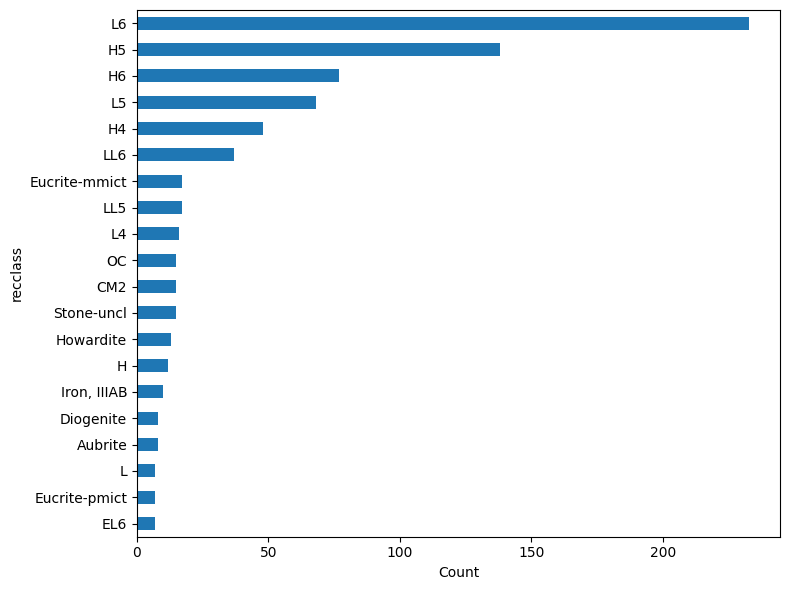

In [100]:
## Top Meteorite Classes - Counts & Relative Frequency

top_n=20
class_counts = df['recclass'].value_counts().head(top_n)
plt.figure(figsize=(8,6))
class_counts.sort_values().plot(kind='barh')
plt.xlabel('Count')
plt.tight_layout()
class_counts.to_csv('outputs/top_20_classes.csv')
plt.savefig('outputs/plots/top20_classes.png', dpi=150)

plt.show()


In [17]:
df.head(
)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,year_only,decade,fall_clean
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,1880,1880,Fell
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,1951,1950,Fell
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,1952,1950,Fell
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,1976,1970,Fell
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,1902,1900,Fell


In [18]:
## I will calculate and dispaly basic Statistics

mass_stats = df['mass'].describe(percentiles= [0.5,0.7,0.9,0.99]).to_frame().T 
mass_stats

,count,mean,std,min,50%,70%,90%,99%,max
mass,943.0,18309.405631,53452.097317,0.15,2910.0,7000.0,40240.0,300000.0,600000.0


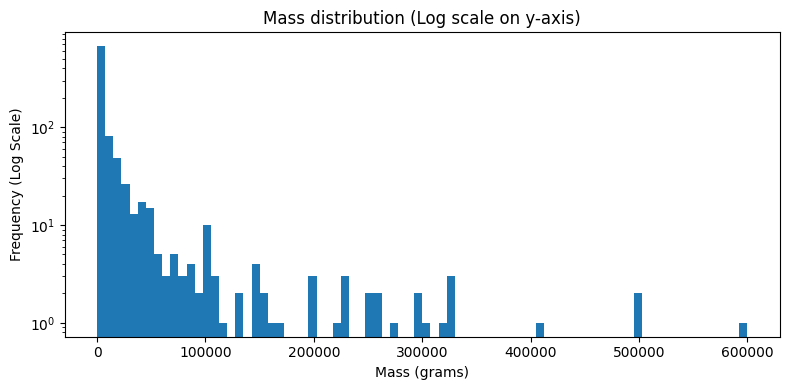

In [19]:
## Now Turning this stats into plot
plt.figure(figsize=(8,4))
plt.hist(df['mass'].dropna(), bins=80, log=True)
plt.title('Mass distribution (Log scale on y-axis)')
plt.xlabel('Mass (grams)')
plt.ylabel('Frequency (Log Scale)')
plt.tight_layout()
plt.show()


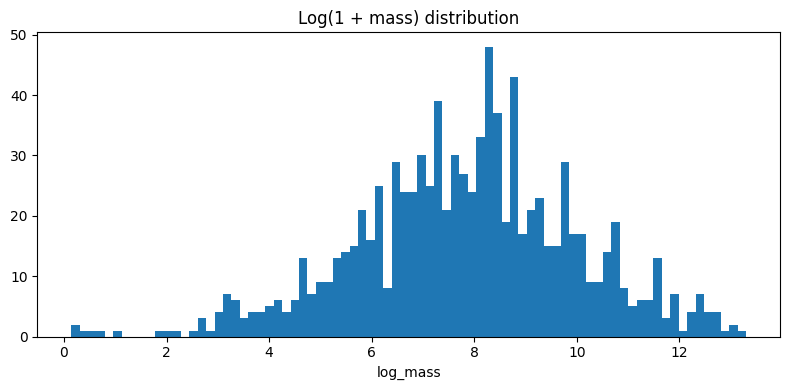

In [101]:
## We will transform this data with Logarithm and will make new visualization for better understanding
## This log function will handle zero value avoiding an error 
df['log_mass'] = np.log1p(df['mass'])
plt.figure(figsize=(8,4))
plt.hist(df['log_mass'].dropna(), bins=80)
plt.title('Log(1 + mass) distribution')
plt.xlabel('log_mass')
plt.tight_layout()

## Why We used log1p???
### log transformation often makes heavily skewed data look more like a standard, bell shaped (Gaussian or Normal) distribution
### The data after log will be much better for ML Learning Algorithm.

### So Basically we are doing a kind of Feature Engineering here, for our ML models that we are 
# going to deploy soon on this data

## Saving the file
mass_stats.to_csv("outputs/mass_summary_stats.csv", index=False)
plt.savefig("outputs/plots/mass_hist.png", dpi=150)
plt.show()


In [21]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,year_only,decade,fall_clean,log_mass
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,1880,1880,Fell,3.091042
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,1951,1950,Fell,6.580639
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,1952,1950,Fell,11.580593
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,1976,1970,Fell,7.557473
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,1902,1900,Fell,6.660575


In [22]:
## Now I want to inspect Top 10 heaviest meteorites

top10_heavy = df.sort_values('mass', ascending=False).head(10)[
    ['name','mass','year_only','recclass','reclat','reclong']
].reset_index(drop=True)
top10_heavy.index += 1  
print(top10_heavy)
top10_heavy.to_csv("outputs/top10_heaviest.csv", index=True)


             name      mass  year_only           recclass    reclat    reclong
1         Jianshi  600000.0       1890        Iron, IIIAB  30.80833  109.50000
2       Knyahinya  500000.0       1866              L/LL5  48.90000   22.40000
3         Ochansk  500000.0       1887                 H4  57.78333   55.26667
4       Paragould  408000.0       1930                LL5  36.06667  -90.50000
5        Bjurböle  330000.0       1899              L/LL4  60.40000   25.80000
6   Millbillillie  330000.0       1960      Eucrite-mmict -26.45000  120.36667
7     Sterlitamak  325000.0       1990        Iron, IIIAB  53.66667   55.98333
8     Estherville  320000.0       1879  Mesosiderite-A3/4  43.41667  -94.83333
9      Bruderheim  303000.0       1960                 L6  53.90000 -112.88333
10        Putinga  300000.0       1937                 L6 -29.03333  -53.05000


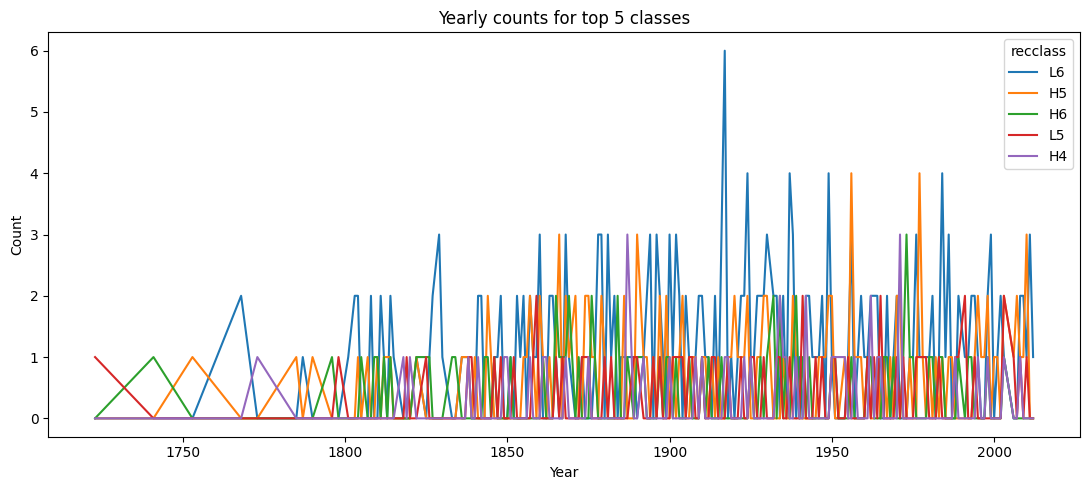

In [102]:
## Now I will inspect "Time Searies By Class"
top5 = df['recclass'].value_counts().head(5).index.tolist()
df_ts = df[df['recclass'].isin(top5)].groupby(['year_only','recclass']).size().unstack(fill_value=0)
df_ts[top5].plot(figsize=(11,5))
plt.title("Yearly counts for top 5 classes")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
df_ts.to_csv("outputs/top5_classes_yearly.csv") 

plt.show()


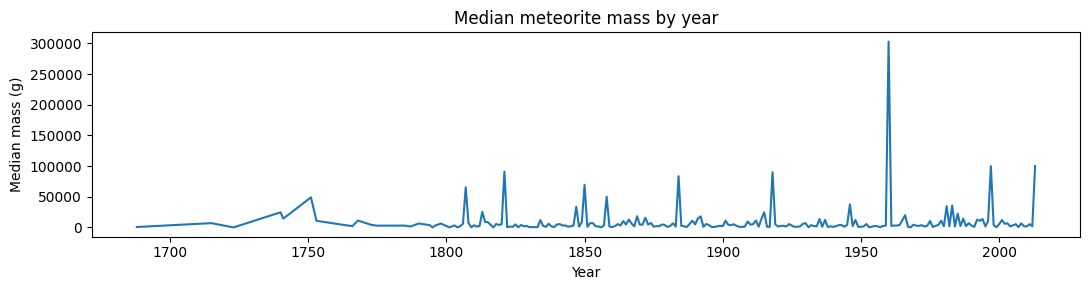

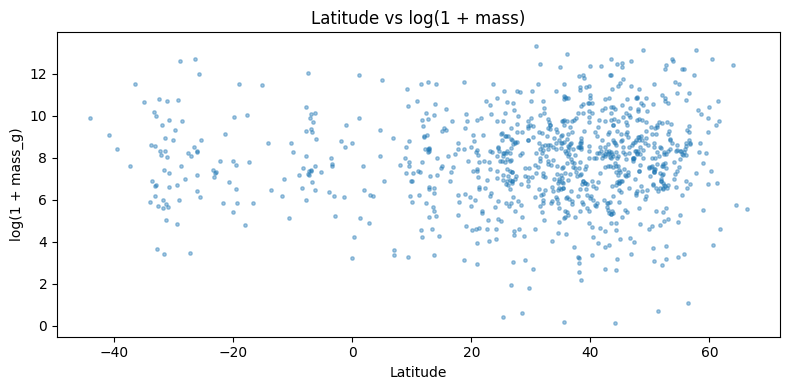

In [104]:
## Now its very inreresting if I find 
# Correlation / simple relationships (mass vs year, mass vs latitude)

# mass vs year (median by year)
median_mass_by_year = df.groupby('year_only')['mass'].median().dropna()
plt.figure(figsize=(11,3))
plt.plot(median_mass_by_year.index, median_mass_by_year.values)
plt.title("Median meteorite mass by year")
plt.xlabel("Year")
plt.ylabel("Median mass (g)")
plt.tight_layout()
plt.savefig("outputs/plots/median_mass_by_year.png", dpi=150)
plt.show()


# mass vs latitude (scatter, log mass for readability)
plt.figure(figsize=(8,4))
plt.scatter(df['reclat'], np.log1p(df['mass']), s=6, alpha=0.4)
plt.title("Latitude vs log(1 + mass)")
plt.xlabel("Latitude")
plt.ylabel("log(1 + mass_g)")
plt.tight_layout()
plt.savefig("outputs/plots/mass_vs_latitude_scatter.png", dpi=150)

plt.show()


In [25]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,year_only,decade,fall_clean,log_mass
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,1880,1880,Fell,3.091042
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,1951,1950,Fell,6.580639
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,1952,1950,Fell,11.580593
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,1976,1970,Fell,7.557473
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,1902,1900,Fell,6.660575


In [38]:
## I think I have done enough EDA for our Machine Learning model to be performed on our wrangled data, so I am going 
# to save a compact EDA summary CSV for quick inspection

summary = {
    'total_records_cleaned': [df.shape[0]],
    'year_min': [df['year_only'].min()],
    'year_max': [df['year_only'].max()],
    'median_mass_g': [df['mass'].median()],
    'mean_mass_g': [df['mass'].mean()],
    'num_unique_classes': [df['recclass'].nunique()]
}
pd.DataFrame(summary).to_csv("outputs/eda_summary.csv", index=False)
print("EDA summary saved to outputs/eda_summary.csv")



EDA summary saved to outputs/eda_summary.csv


In [47]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,year_only,decade,fall_clean,log_mass
0,Aachen,1,Valid,L5,21.0,Fell,1970,50.77500,6.08333,1880,1880,Fell,3.091042
1,Aarhus,2,Valid,H6,720.0,Fell,1970,56.18333,10.23333,1951,1950,Fell,6.580639
2,Abee,6,Valid,EH4,107000.0,Fell,1970,54.21667,-113.00000,1952,1950,Fell,11.580593
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1970,16.88333,-99.90000,1976,1970,Fell,7.557473
4,Achiras,370,Valid,L6,780.0,Fell,1970,-33.16667,-64.95000,1902,1900,Fell,6.660575


In [ ]:
## I think we should do some more EDA because we want to extract patterns from it 
# for Machine Learning models to deploy on it

In [50]:

# We cannot analyze trends unless year is numeric
df['year'] = pd.to_datetime(df['year'], errors='coerce').dt.year
df = df.dropna(subset=['year'])


In [51]:
# Better to remove rows with missing critical info
df = df.dropna(subset=['mass'])


In [52]:
## I want to see Meteroit Per Year, Whats its trend over time (till now)
## Here the Scientific Question arises, "Are Meteroit discoveries increasing over time?"
yearly_counts = df['year_only'].value_counts().sort_index()
yearly_counts.head()



year_only
1688    1
1715    1
1723    1
1740    1
1741    1
Name: count, dtype: int64

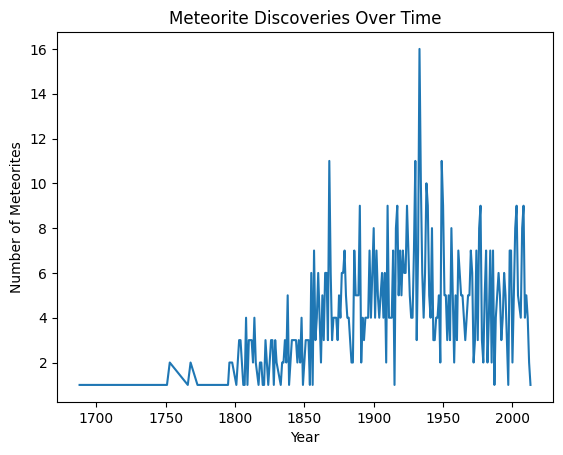

In [105]:
# Plot for the Trends
import matplotlib.pyplot as plt

plt.figure()
yearly_counts.plot()
plt.xlabel("Year")
plt.ylabel("Number of Meteorites")
plt.title("Meteorite Discoveries Over Time")
plt.savefig("outputs/plots/plot_for_Trends_over_time.png", dpi=150)
plt.show()


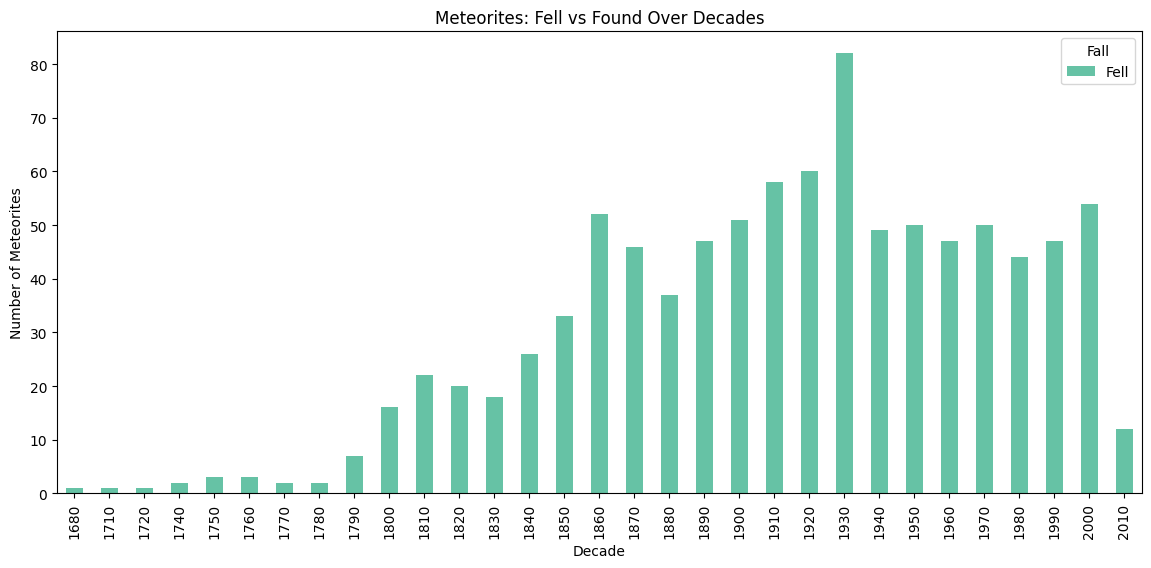

In [106]:
# I am also gona cehck Meteorites found vs fell (fall type) over decades
df['decade'] = (df['year_only'] // 10) * 10

fall_counts = df.groupby(['decade', 'fall']).size().unstack(fill_value=0)

fall_counts.plot(kind='bar', stacked=True, figsize=(14,6), colormap='Set2')
plt.xlabel("Decade")
plt.ylabel("Number of Meteorites")
plt.title("Meteorites: Fell vs Found Over Decades")
plt.legend(title='Fall')
plt.savefig("outputs/plots/meteorites_fall_type.png", dpi=150)
plt.show()

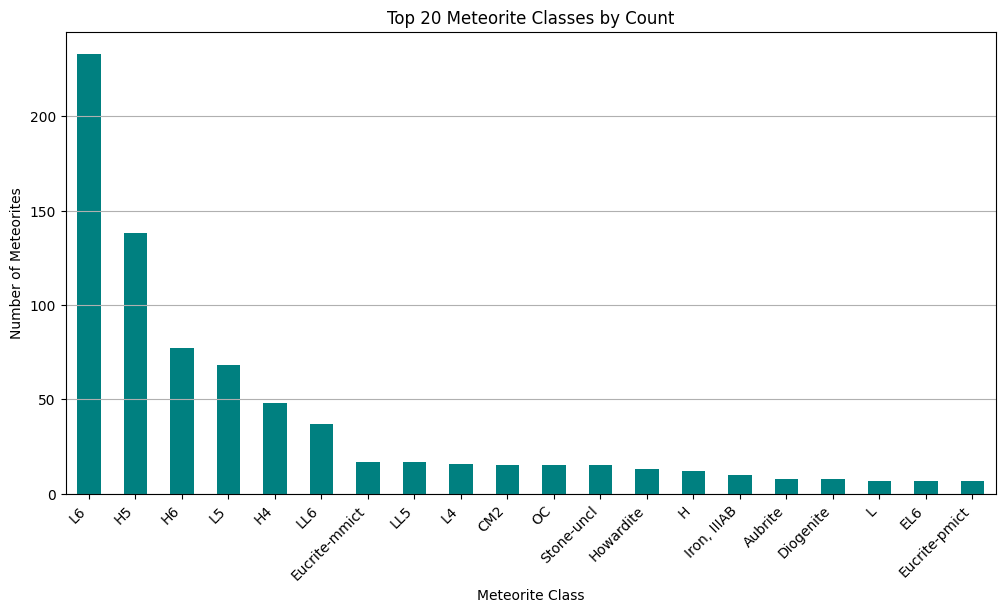

In [107]:
# Also, The Top 20 meteorite classes by count
top_classes = df['recclass'].value_counts().head(20)

plt.figure(figsize=(12,6))
top_classes.plot(kind='bar', color='teal')
plt.xlabel("Meteorite Class")
plt.ylabel("Number of Meteorites")
plt.title("Top 20 Meteorite Classes by Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.savefig("outputs/plots/Top_20_Meteorites_classes.png", dpi=150)
plt.show()


In [ ]:
# Ok Now the EDA part is perfectly done
# the Next Step is to chose best Machine Learning Model for this data that we have just made ready
## 

In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [57]:
# Gona Select features and drop rows with missing values
ml_df = df[['mass', 'reclat', 'reclong']].dropna()


In [59]:
# Now I have to Convert 'mass' to numeric (if not already, incase we missed it earlier, 
# I am not gona check and scroll upside LoL, its better to double check it witht this code for our safety)
ml_df['mass'] = pd.to_numeric(ml_df['mass'], errors='coerce')
ml_df = ml_df.dropna(subset=['mass'])


In [60]:
# Scale features to standard normal
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ml_df)

In [61]:
# Lets Determine optimal number of clusters using Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


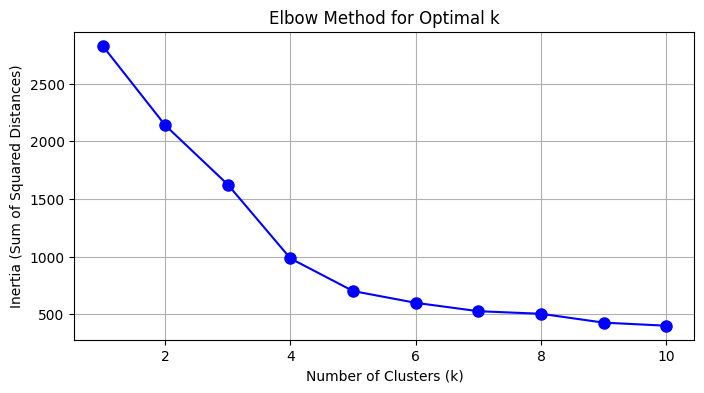

In [108]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.savefig("outputs/plots/Optimal_numbers_of_clusters.png", dpi=150)
plt.show()


In [63]:
# I am gona Fit KMeans with chosen k 
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [65]:
# I will Add cluster labels to dataframe
ml_df['cluster'] = clusters

# And then Summarize clusters
cluster_summary = ml_df.groupby('cluster').mean()
print(cluster_summary)


                 mass     reclat    reclong
cluster                                    
0        21915.768545  36.767823 -93.054793
1        18205.814120  40.138510  47.959698
2        15540.240622  -8.762993  28.009716


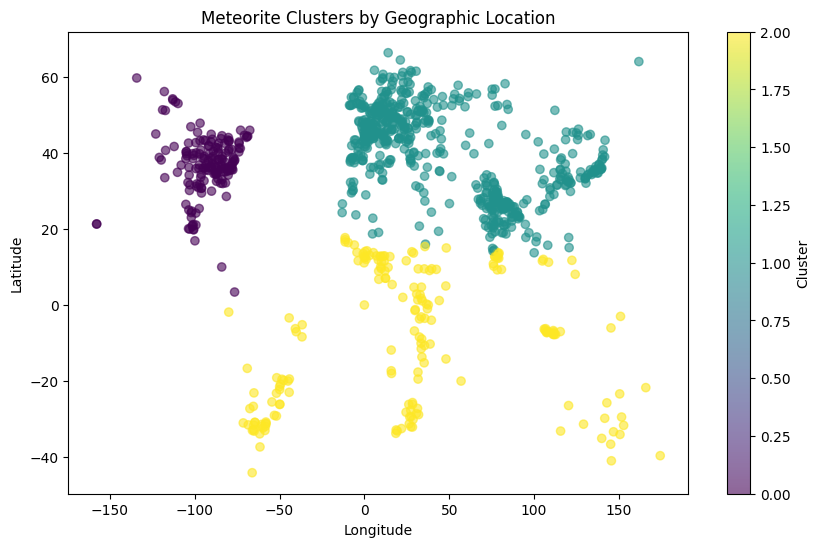

In [109]:
# Visualize clusters by geographic location
plt.figure(figsize=(10, 6))
scatter = plt.scatter(ml_df['reclong'], ml_df['reclat'], c=ml_df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Clusters by Geographic Location')
plt.colorbar(scatter, label='Cluster')
plt.savefig("outputs/plots/Meteorite_clusters_by_Geographic_Location.png", dpi=150)
plt.show()


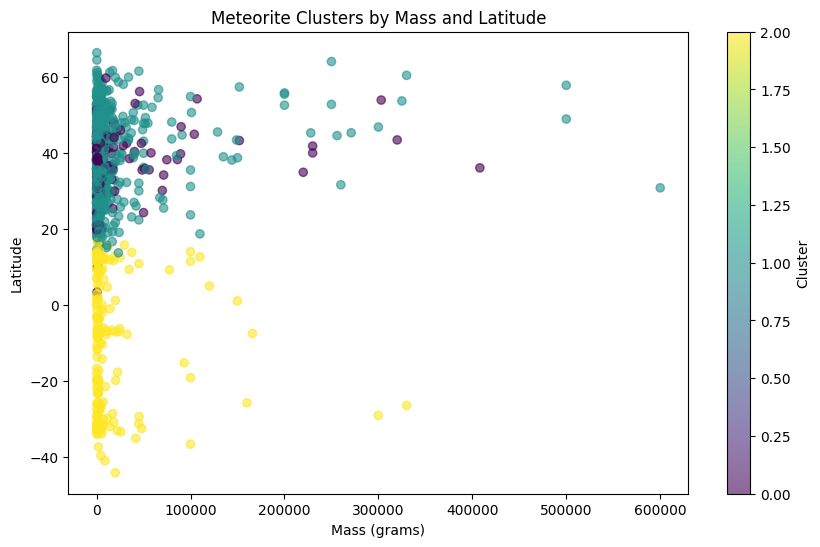

In [110]:
# Visualize clusters by mass vs latitude
plt.figure(figsize=(10, 6))
scatter = plt.scatter(ml_df['mass'], ml_df['reclat'], c=ml_df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Mass (grams)')
plt.ylabel('Latitude')
plt.title('Meteorite Clusters by Mass and Latitude')
plt.colorbar(scatter, label='Cluster')
plt.savefig("outputs/plots/Meteorite_Clusters_by_Mass_and_Latitude.png", dpi=150)
plt.show()


In [69]:
## I am gona save the model for future use::
import os
import joblib

os.makedirs('models', exist_ok=True)

# Save the trained KMeans model
joblib.dump(kmeans, 'models/kmeans_meteorites.pkl')


['models/kmeans_meteorites.pkl']